In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-22.824229048613304 -111.58842761237621
-43.45240344166239 128.55090196762757
68.97314271890193 -84.736194304631
79.85461169409118 -7.876304107548066
-14.13656067824671 -77.72100381549953
60.51404453841053 -155.93372710497616
-61.23715752681983 -76.43235525811241
73.46098214360234 -68.07380263196
53.80502452283696 -125.42958828238137
-46.29907693314671 144.08833787317343
64.30957032990975 -30.126179971096832
-27.676921397505467 82.59015762564053
34.481366635616084 -59.556259632598696
0.48767486700593565 122.24736976851256
67.94213589605863 61.34900449953872
-52.508701833685855 73.4099844782302
-78.8483031848657 -174.94021730801842
-9.524782141439317 -111.48129532235812
-42.948014013279604 141.31540283100776
-49.534464292609485 29.907338209823507
-18.577606115863546 47.47929398421434
10.814859681066352 -154.7303207041292
18.963201122752338 -82.00900322748645
88.29675792927083 33.406403383418166
-33.94376389960841 -118.43354936740023
-79.37632531834585 69.8893665536931
-13.79642404710885

51.43753623509994 -110.08137219387834
-18.886439638636418 56.95621533647105
23.57048685645988 126.08095919902121
-41.02694901673914 143.23949879313165
-32.59978500965399 -112.80070151358895
-4.589823725451581 -31.985964292637078
28.453850392436905 -35.76824435026276
72.72584359232778 -14.830178756789564
-3.2155411695407565 139.65032074292264
21.263632626041968 -179.49388999382128
69.57995636388216 -118.6546598548342
-36.45325058626842 129.84323854249203
-65.35768408335093 -166.61915654893411
-18.957074148425036 -116.99937696619295
-83.88748769947368 136.17839145772058
-0.3703630944127809 -25.118997344464816
89.63461533976863 -140.06605849173565
-9.893171903099315 3.1488520393065755
26.28172926227721 51.57271682689344
80.25491484809513 179.96129039184535
-52.995729266763014 2.824674818535698
-72.91406989430526 135.67929026918148
34.382779669665695 113.141475294565
-39.3752200191255 -179.4285411455094
-42.559121626148965 33.95970458850746
33.86225737129226 -104.34688270542057
73.09102631

-66.3838765118806 147.1530719244082
-34.16730076146469 -39.389388572972734
24.504222987137098 -72.08761572931829
-17.97152803271068 74.55388999141192
56.38879275206108 -9.183379171994062
-29.289531549083904 25.429734230110228
-15.008718966324537 10.563206269998346
-75.34976381883176 -5.925779080728972
34.263391952111135 -52.88937377048572
16.578119671001687 -78.61574702108891
-3.5470429042332228 65.54515908952789
50.0481347415936 -42.46541424034265
41.805725830668166 88.14999636233455
-82.76562069169402 -151.9706159184134
-7.457111771776042 -149.79369685065834
78.29084697820167 -139.8621044326442
-65.003867775012 -30.023081957760155
10.852164404647908 -62.62947415569944
31.476317937846915 -120.74693864860511


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7e55e424bd91c4b4ae06c5bd667d204b


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | husavik
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | burns lake
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | olafsvik
Processing Record 12 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | gorontalo
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | port elizabeth
Process

Processing Record 35 of Set 4 | iqaluit
Processing Record 36 of Set 4 | katsuura
Processing Record 37 of Set 4 | xiongyue
Processing Record 38 of Set 4 | corinto
Processing Record 39 of Set 4 | saldanha
Processing Record 40 of Set 4 | rio grande
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | hirara
Processing Record 43 of Set 4 | burnie
Processing Record 44 of Set 4 | tuatapere
Processing Record 45 of Set 4 | wasilla
Processing Record 46 of Set 4 | cardito
Processing Record 47 of Set 4 | manthani
Processing Record 48 of Set 4 | kruisfontein
Processing Record 49 of Set 4 | lodja
Processing Record 50 of Set 4 | phon
Processing Record 1 of Set 5 | port-de-paix
City not found. Skipping...
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | olga
Processing Record 4 of Set 5 | carauari
Processing Record 5 of Set 5 | port augusta
Processing Record 6 of Set 5 | gizo
Processing Record 7 of Set 5 | tsihombe
City not found. Skipping...
Processing Rec

Processing Record 29 of Set 8 | caningay
Processing Record 30 of Set 8 | tasiilaq
Processing Record 31 of Set 8 | krasnoarmeysk
Processing Record 32 of Set 8 | aranos
Processing Record 33 of Set 8 | oga
Processing Record 34 of Set 8 | salamanca
Processing Record 35 of Set 8 | carutapera
Processing Record 36 of Set 8 | paytug
City not found. Skipping...
Processing Record 37 of Set 8 | christchurch
Processing Record 38 of Set 8 | toliary
City not found. Skipping...
Processing Record 39 of Set 8 | mar del plata
Processing Record 40 of Set 8 | sept-iles
Processing Record 41 of Set 8 | amancio
City not found. Skipping...
Processing Record 42 of Set 8 | evensk
Processing Record 43 of Set 8 | stoughton
Processing Record 44 of Set 8 | srednekolymsk
Processing Record 45 of Set 8 | langxiang
Processing Record 46 of Set 8 | omidiyeh
Processing Record 47 of Set 8 | ribeira brava
Processing Record 48 of Set 8 | quepos
Processing Record 49 of Set 8 | pacific grove
Processing Record 50 of Set 8 | nam

Processing Record 14 of Set 12 | tanete
Processing Record 15 of Set 12 | tambo
Processing Record 16 of Set 12 | opuwo
Processing Record 17 of Set 12 | antsohihy
Processing Record 18 of Set 12 | biltine
Processing Record 19 of Set 12 | chililabombwe
Processing Record 20 of Set 12 | vestmannaeyjar
Processing Record 21 of Set 12 | north bend
Processing Record 22 of Set 12 | hokitika
Processing Record 23 of Set 12 | khash
Processing Record 24 of Set 12 | arraial do cabo
Processing Record 25 of Set 12 | fazilka
Processing Record 26 of Set 12 | hemsedal
Processing Record 27 of Set 12 | longlac
City not found. Skipping...
Processing Record 28 of Set 12 | rondonopolis
Processing Record 29 of Set 12 | oranjemund
Processing Record 30 of Set 12 | yagodnoye
Processing Record 31 of Set 12 | rovaniemi
Processing Record 32 of Set 12 | lorengau
Processing Record 33 of Set 12 | kimberley
Processing Record 34 of Set 12 | bowen
Processing Record 35 of Set 12 | mount gambier
Processing Record 36 of Set 12

In [8]:
len(city_data)

573

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moron,-34.6534,-58.6198,67.80,64,1,7.54,AR,2022-07-20 17:49:48
1,Mugur-Aksy,50.3500,90.5000,46.13,71,55,3.47,RU,2022-07-20 17:49:49
2,Chuy,-33.6971,-53.4616,60.75,79,0,10.33,UY,2022-07-20 17:49:50
3,Dingle,10.9995,122.6711,77.29,88,74,2.17,PH,2022-07-20 17:49:52
4,Georgetown,5.4112,100.3354,81.90,89,20,1.14,MY,2022-07-20 17:47:19
5,Vostok,46.4856,135.8833,58.82,98,87,2.66,RU,2022-07-20 17:49:53
6,Ribeira Grande,38.5167,-28.7000,75.60,83,20,8.05,PT,2022-07-20 17:49:53
7,Souillac,-20.5167,57.5167,70.18,68,40,21.85,MU,2022-07-20 17:49:54
8,Punta Arenas,-53.1500,-70.9167,35.62,80,75,25.32,CL,2022-07-20 17:49:55
9,Ihosy,-22.4000,46.1167,57.74,93,11,7.31,MG,2022-07-20 17:49:56


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Moron,AR,2022-07-20 17:49:48,-34.6534,-58.6198,67.80,64,1,7.54
1,Mugur-Aksy,RU,2022-07-20 17:49:49,50.3500,90.5000,46.13,71,55,3.47
2,Chuy,UY,2022-07-20 17:49:50,-33.6971,-53.4616,60.75,79,0,10.33
3,Dingle,PH,2022-07-20 17:49:52,10.9995,122.6711,77.29,88,74,2.17
4,Georgetown,MY,2022-07-20 17:47:19,5.4112,100.3354,81.90,89,20,1.14
5,Vostok,RU,2022-07-20 17:49:53,46.4856,135.8833,58.82,98,87,2.66
6,Ribeira Grande,PT,2022-07-20 17:49:53,38.5167,-28.7000,75.60,83,20,8.05
7,Souillac,MU,2022-07-20 17:49:54,-20.5167,57.5167,70.18,68,40,21.85
8,Punta Arenas,CL,2022-07-20 17:49:55,-53.1500,-70.9167,35.62,80,75,25.32
9,Ihosy,MG,2022-07-20 17:49:56,-22.4000,46.1167,57.74,93,11,7.31


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658340534.0383492

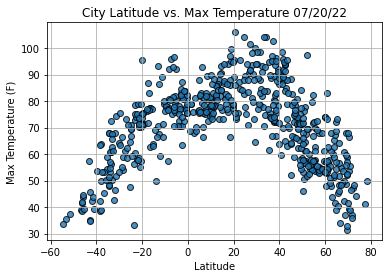

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

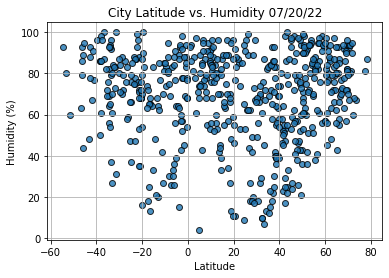

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

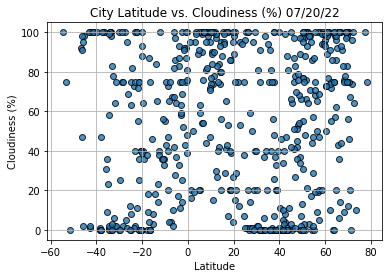

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

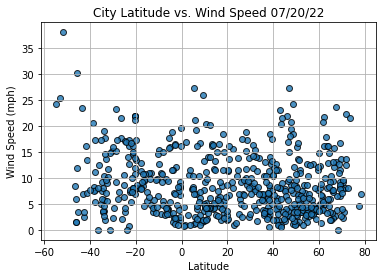

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

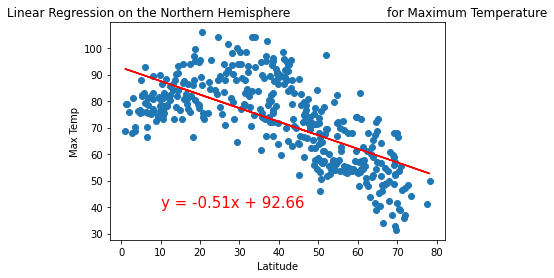

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

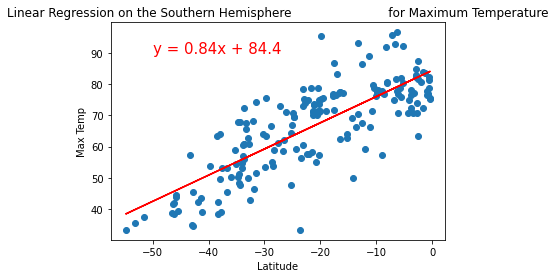

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

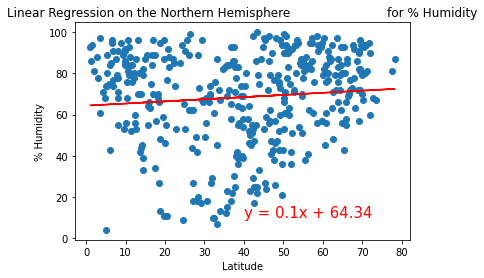

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

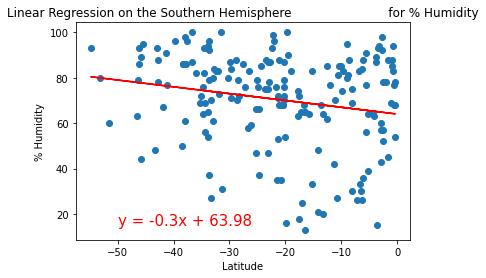

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

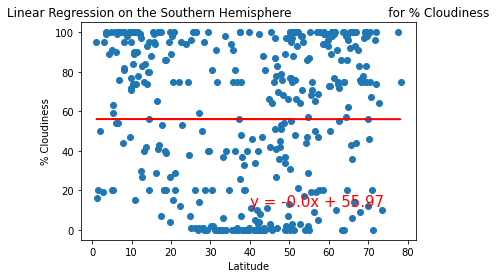

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,12))

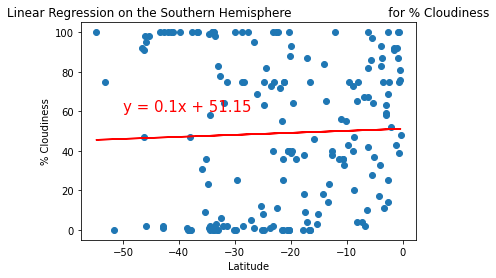

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

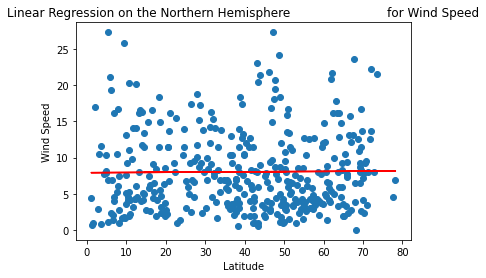

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

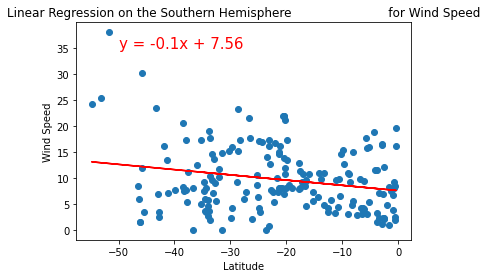

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))